## Multivariate Financial Time Series Analysis
### Apply diffrent machine learning methods combined with sentiment analysis and topic modeling

© Minxuan Wang - 2018: All rights reservered.

In [6]:
import cryptocompare # I used bitcoin prices earlier, this package can help
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
from pytrends.request import TrendReq
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr
import demjson
import eventregistry
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [8]:
# Related stock price and ETF price
# Query stock data from Yahoo! Financial using fix_yahoo_finance
import fix_yahoo_finance as yf 

# Specify start and end time here
start = datetime.datetime(2016, 1, 4)
end = datetime.datetime(2018, 6, 5)

# Stock price
googl = yf.download('GOOGL', start, end)
amzn = yf.download('AMZN', start, end)
aapl = yf.download('AAPL', start, end)
fb = yf.download('FB', start, end)
dji = yf.download('^DJI', start, end)
sp500 = yf.download('^GSPC', start, end)
nasdaq = yf.download('^IXIC', start, end)
spy = yf.download('SPY', start, end)
fdn = yf.download('FDN', start, end)
ivw = yf.download('IVW', start, end)
iyw = yf.download('IYW', start, end)
vug = yf.download('VUG', start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [9]:
# Cleaning and resampling data
googl = googl.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
amzn = amzn.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
aapl = aapl.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
fb = fb.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
dji = dji.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
sp500 = sp500.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
nasdaq = nasdaq.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
spy = spy.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
fdn = fdn.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
ivw = ivw.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
iyw = iyw.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')
vug = vug.resample('1d').interpolate(method='linear').drop(['Open', 'Low', 'Close', 'High', 'Volume'], axis='columns')

In [10]:
googl.columns = ['googl']
amzn.columns = ['amzn']
aapl.columns = ['aapl']
fb.columns = ['fb']
dji.columns = ['dji']
sp500.columns = ['sp500']
nasdaq.columns = ['nasdaq']
spy.columns = ['spy']
fdn.columns = ['fdn']
ivw.columns = ['ivw']
iyw.columns = ['iyw']
vug.columns = ['vug']

In [ ]:
# Get Google Trends Indices and Resample the data into daily

#!pip install pytrend
from pytrends.request import TrendReq
pytrend = TrendReq()

pytrend.build_payload(kw_list=['google'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
google_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['apple'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
apple_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['facebook'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
facebook_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['virtual reality'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
vr_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['google glass'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
google_glass_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['android vr'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
android_vr_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['youtube'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
youtube_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['self-driving car'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
selfdriving_car_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['enterprise software'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
enterprise_software_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['IaaS'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
iaas_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['android'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
android_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['google assistant'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
google_assistant_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['AI'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
AI_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['pixel'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
pixel_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['gmail'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
gmail_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['uber'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
uber_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['google news'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
google_news_trends = pytrend.interest_over_time()

pytrend.build_payload(kw_list=['google play'], cat=0, timeframe='2016-01-03'+' '+'2018-06-05')
google_play_trends = pytrend.interest_over_time()


google = google_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
apple = apple_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
facebook = facebook_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
VR = vr_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
google_glass = google_glass_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
android_vr = android_vr_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
youtube = youtube_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
selfdriving_car = selfdriving_car_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
enterprise_software = enterprise_software_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
IaaS = iaas_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
android = android_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
google_assistant = google_assistant_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
AI = AI_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
pixel = pixel_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
gmail = gmail_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
uber = uber_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
google_news = google_news_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')
google_play = google_play_trends.resample('1d').interpolate(method='linear').drop(['isPartial'], axis='columns')

# Output as csv file for future use

In [14]:
# Import Google Trends Data
ai_trends = pd.read_csv('ai_trends.csv', index_col='date')
android_trends = pd.read_csv('android_trends.csv', index_col='date')
android_vr_trends = pd.read_csv('android_vr_trends.csv', index_col='date')
apple_trends = pd.read_csv('apple_trends.csv', index_col='date')
enterprise_software_trends = pd.read_csv('enterprise_software.csv', index_col='date')
facebook_trends = pd.read_csv('facebook_trends.csv', index_col='date')
gmail_trends = pd.read_csv('gmail_trends.csv', index_col='date')
google_assistant_trends = pd.read_csv('google_assistant_trends.csv', index_col='date')
google_glass_trends = pd.read_csv('google_glass_trends.csv', index_col='date')
google_news_trends = pd.read_csv('google_news_trends.csv', index_col='date')
google_play_trends = pd.read_csv('google_play_trends.csv', index_col='date')
google_trends = pd.read_csv('google_trends.csv', index_col='date')
IaaS_trends = pd.read_csv('IaaS_trends.csv', index_col='date')
pixel_trends = pd.read_csv('pixel_trends.csv', index_col='date')
selfdriving_car_trends = pd.read_csv('selfdriving_car_trends.csv', index_col='date')
uber_trends = pd.read_csv('uber_trends.csv', index_col='date')
VR_trends = pd.read_csv('VR_trends.csv', index_col='date')
youtube_trends = pd.read_csv('youtube_trends.csv', index_col='date')

In [26]:
sentimentraw = pd.read_csv('sentiment time series.csv', index_col='date')
sentimentraw.columns = ['sentiment']
sentimentraw.index = pd.to_datetime(sentimentraw.index)
sentimentraw.index.name = 'time'

sentiment = sentimentraw.resample('1d').interpolate(method='linear')
sentiment.head()

,sentiment
time,
2016-01-04,0.097372
2016-01-05,0.119200
2016-01-06,0.100297
2016-01-07,0.062459
2016-01-08,0.153506


In [27]:
# Joining data frames

data_combined_1 = pd.concat([googl, amzn, aapl, fb, dji, sp500, nasdaq, spy, fdn, ivw, iyw, vug], axis=1).dropna(how='any')
data_combined_2 = pd.concat([ai_trends, android_trends, android_vr_trends, apple_trends, enterprise_software_trends, facebook_trends, gmail_trends, google_assistant_trends, google_glass_trends, google_news_trends, google_play_trends, google_trends, IaaS_trends, pixel_trends, selfdriving_car_trends, uber_trends, VR_trends, youtube_trends], axis=1).dropna(how='any')

data_combined_1.index.name = 'time'
data_combined_2.index.name = 'time'

sentiment.index.name='time'
# Make into same lenth

data_combined_2 = data_combined_2.drop(data_combined_2.index[[0]])
data_combined_1 = data_combined_1.drop(data_combined_1.index[[882, 883]])

data_combined = pd.concat([data_combined_1, data_combined_2, sentiment], axis=1).dropna(how='any')
print(data_combined.head())
data_combined.to_csv('googl_df.csv')

                 googl        amzn        aapl          fb           dji  \
time                                                                       
2016-01-04  759.440002  636.989990  100.626175  102.220001  17148.939453   
2016-01-05  761.530029  633.789978   98.104546  102.730003  17158.660156   
2016-01-06  759.330017  632.650024   96.184654  102.970001  16906.509766   
2016-01-07  741.000000  607.940002   92.125244   97.919998  16514.099609   
2016-01-08  730.909973  607.049988   92.612358   97.330002  16346.450195   

                  sp500       nasdaq         spy        fdn         ivw  \
time                                                                      
2016-01-04  2012.660034  4903.089844  192.270966  72.330002  110.118095   
2016-01-05  2016.709961  4891.430176  192.596176  72.080002  110.331047   
2016-01-06  1990.260010  4835.759766  190.166733  71.669998  109.120979   
2016-01-07  1943.089966  4689.430176  185.604340  69.010002  106.352303   
2016-01-08  1922.

In [28]:
# Modifications to the data or indices of the copy will not be reflected in the original object

data_combined_scaled = data_combined.copy(deep=True)

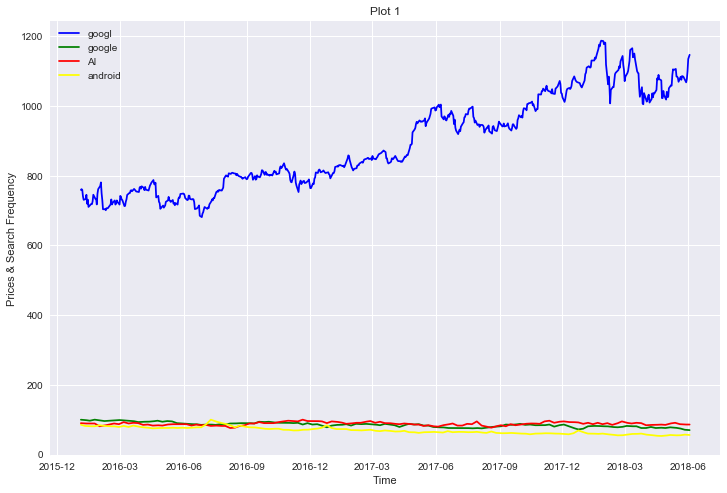

In [29]:
# Plot 1- plot of GOOGL stock prices and Google Trends search frequency data

sns.set()
plt.figure(figsize=(12, 8))
plt.plot(data_combined.index, data_combined['googl'], color='blue')
plt.plot(data_combined.index, data_combined['google'], color='green')
plt.plot(data_combined.index, data_combined['AI'], color='red')
plt.plot(data_combined.index, data_combined['android'], color='yellow')

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Prices & Search Frequency')
plt.title('Plot 1')
plt.show()

# Can't see clearly, hence we need to scale it

In [30]:
list(data_combined)

['googl',
 'amzn',
 'aapl',
 'fb',
 'dji',
 'sp500',
 'nasdaq',
 'spy',
 'fdn',
 'ivw',
 'iyw',
 'vug',
 'AI',
 'android',
 'android vr',
 'apple',
 'enterprise software',
 'facebook',
 'gmail',
 'google assistant',
 'google glass',
 'google news',
 'google play',
 'google',
 'IaaS',
 'pixel',
 'self-driving car',
 'uber',
 'virtual reality',
 'youtube',
 'sentiment']

In [31]:
# Feature Scaling: Standardize features by removing the mean and scaling to unit variance 
# This will capture trend information and makes visualization more meaningful

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
data_combined_scaled['googl'] = sc_x.fit_transform(data_combined_scaled['googl'].values.reshape(-1,1))
data_combined_scaled['amzn'] = sc_x.fit_transform(data_combined_scaled['amzn'].values.reshape(-1,1))
data_combined_scaled['aapl'] = sc_x.fit_transform(data_combined_scaled['aapl'].values.reshape(-1,1))
data_combined_scaled['fb'] = sc_x.fit_transform(data_combined_scaled['fb'].values.reshape(-1,1))
data_combined_scaled['dji'] = sc_x.fit_transform(data_combined_scaled['dji'].values.reshape(-1,1))
data_combined_scaled['sp500'] = sc_x.fit_transform(data_combined_scaled['sp500'].values.reshape(-1,1))
data_combined_scaled['nasdaq'] = sc_x.fit_transform(data_combined_scaled['nasdaq'].values.reshape(-1,1))
data_combined_scaled['spy'] = sc_x.fit_transform(data_combined_scaled['spy'].values.reshape(-1,1))
data_combined_scaled['fdn'] = sc_x.fit_transform(data_combined_scaled['fdn'].values.reshape(-1,1))
data_combined_scaled['ivw'] = sc_x.fit_transform(data_combined_scaled['ivw'].values.reshape(-1,1))
data_combined_scaled['iyw'] = sc_x.fit_transform(data_combined_scaled['iyw'].values.reshape(-1,1))
data_combined_scaled['vug'] = sc_x.fit_transform(data_combined_scaled['vug'].values.reshape(-1,1))
data_combined_scaled['AI'] = sc_x.fit_transform(data_combined_scaled['AI'].values.reshape(-1,1))
data_combined_scaled['android'] = sc_x.fit_transform(data_combined_scaled['android'].values.reshape(-1,1))
data_combined_scaled['android vr'] = sc_x.fit_transform(data_combined_scaled['android vr'].values.reshape(-1,1))
data_combined_scaled['apple'] = sc_x.fit_transform(data_combined_scaled['apple'].values.reshape(-1,1))
data_combined_scaled['enterprise software'] = sc_x.fit_transform(data_combined_scaled['enterprise software'].values.reshape(-1,1))
data_combined_scaled['facebook'] = sc_x.fit_transform(data_combined_scaled['facebook'].values.reshape(-1,1))
data_combined_scaled['gmail'] = sc_x.fit_transform(data_combined_scaled['gmail'].values.reshape(-1,1))
data_combined_scaled['google assistant'] = sc_x.fit_transform(data_combined_scaled['google assistant'].values.reshape(-1,1))
data_combined_scaled['google glass'] = sc_x.fit_transform(data_combined_scaled['google glass'].values.reshape(-1,1))
data_combined_scaled['google news'] = sc_x.fit_transform(data_combined_scaled['google news'].values.reshape(-1,1))
data_combined_scaled['google play'] = sc_x.fit_transform(data_combined_scaled['google play'].values.reshape(-1,1))
data_combined_scaled['google'] = sc_x.fit_transform(data_combined_scaled['google'].values.reshape(-1,1))
data_combined_scaled['IaaS'] = sc_x.fit_transform(data_combined_scaled['IaaS'].values.reshape(-1,1))
data_combined_scaled['pixel'] = sc_x.fit_transform(data_combined_scaled['pixel'].values.reshape(-1,1))
data_combined_scaled['self-driving car'] = sc_x.fit_transform(data_combined_scaled['self-driving car'].values.reshape(-1,1))
data_combined_scaled['uber'] = sc_x.fit_transform(data_combined_scaled['uber'].values.reshape(-1,1))
data_combined_scaled['virtual reality'] = sc_x.fit_transform(data_combined_scaled['virtual reality'].values.reshape(-1,1))
data_combined_scaled['youtube'] = sc_x.fit_transform(data_combined_scaled['youtube'].values.reshape(-1,1))
data_combined_scaled['sentiment'] = sc_x.fit_transform(data_combined_scaled['sentiment'].values.reshape(-1,1))

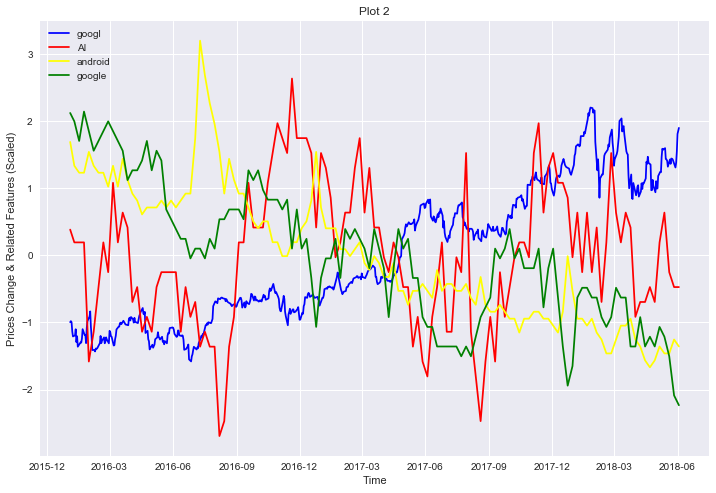

In [32]:
# Plot 2- scaled overlay plot of GOOGL prices and Others (Part)

sns.set()
plt.figure(figsize=(12, 8))
plt.plot(data_combined_scaled.index, data_combined_scaled['googl'], color='blue')
plt.plot(data_combined_scaled.index, data_combined_scaled['AI'], color='red')
plt.plot(data_combined_scaled.index, data_combined_scaled['android'], color='yellow')
plt.plot(data_combined_scaled.index, data_combined_scaled['google'], color='green')

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Prices Change & Related Features (Scaled)')
plt.title('Plot 2')
plt.show()

In [33]:
# Features correlation
%matplotlib inline
# calculate the correlation matrix
corr = data_combined_scaled.corr()

# plot the heatmap
#sns.heatmap(corr, 
        #xticklabels=corr.columns,
        #yticklabels=corr.columns)

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '9pt'})\
    .set_caption("Correlation Heatmap Minxuan")\
    .set_precision(2)\
    .set_table_styles(magnify())

,googl,amzn,aapl,fb,dji,sp500,nasdaq,spy,fdn,ivw,iyw,vug,AI,android,android vr,apple,enterprise software,facebook,gmail,google assistant,google glass,google news,google play,google,IaaS,pixel,self-driving car,uber,virtual reality,youtube,sentiment
googl,1,0.92,0.96,0.96,0.97,0.97,0.98,0.97,0.96,0.98,0.98,0.98,0.065,-0.88,-0.35,0.16,0.2,-0.93,-0.81,0.81,-0.71,0.21,-0.85,-0.77,0.62,0.48,0.052,0.32,-0.36,-0.72,-0.015
amzn,0.92,1,0.9,0.88,0.92,0.92,0.95,0.93,0.98,0.96,0.95,0.95,0.058,-0.84,-0.35,0.053,0.11,-0.92,-0.78,0.8,-0.71,0.14,-0.79,-0.78,0.62,0.41,0.14,0.31,-0.36,-0.75,-0.016
aapl,0.96,0.9,1,0.96,0.96,0.96,0.98,0.97,0.95,0.97,0.98,0.97,0.065,-0.91,-0.37,0.15,0.23,-0.95,-0.8,0.88,-0.74,0.27,-0.88,-0.79,0.7,0.47,0.066,0.36,-0.37,-0.74,-0.021
fb,0.96,0.88,0.96,1,0.95,0.96,0.96,0.96,0.94,0.96,0.96,0.97,0.022,-0.88,-0.36,0.22,0.24,-0.91,-0.8,0.82,-0.72,0.31,-0.87,-0.78,0.64,0.5,0.0038,0.37,-0.4,-0.66,-0.034
dji,0.97,0.92,0.96,0.95,1,1,0.99,1,0.97,0.99,0.98,0.99,0.11,-0.88,-0.27,0.15,0.19,-0.96,-0.83,0.83,-0.76,0.23,-0.83,-0.81,0.62,0.49,0.059,0.36,-0.29,-0.7,-0.024
sp500,0.97,0.92,0.96,0.96,1,1,0.99,1,0.97,0.99,0.99,0.99,0.09,-0.88,-0.26,0.16,0.19,-0.96,-0.83,0.83,-0.78,0.25,-0.84,-0.82,0.63,0.49,0.067,0.42,-0.3,-0.72,-0.024
nasdaq,0.98,0.95,0.98,0.96,0.99,0.99,1,0.99,0.99,1,1,1,0.083,-0.9,-0.32,0.15,0.2,-0.97,-0.83,0.84,-0.76,0.25,-0.87,-0.82,0.66,0.49,0.086,0.39,-0.34,-0.75,-0.02
spy,0.97,0.93,0.97,0.96,1,1,0.99,1,0.97,0.99,0.99,0.99,0.09,-0.88,-0.27,0.16,0.19,-0.96,-0.83,0.83,-0.78,0.26,-0.85,-0.83,0.64,0.5,0.07,0.41,-0.3,-0.73,-0.024
fdn,0.96,0.98,0.95,0.94,0.97,0.97,0.99,0.97,1,0.99,0.99,0.98,0.074,-0.88,-0.34,0.13,0.17,-0.96,-0.82,0.84,-0.75,0.21,-0.84,-0.8,0.65,0.47,0.11,0.36,-0.35,-0.75,-0.018
ivw,0.98,0.96,0.97,0.96,0.99,0.99,1,0.99,0.99,1,1,1,0.051,-0.88,-0.34,0.14,0.17,-0.95,-0.83,0.84,-0.75,0.23,-0.85,-0.81,0.64,0.47,0.076,0.35,-0.36,-0.73,-0.025


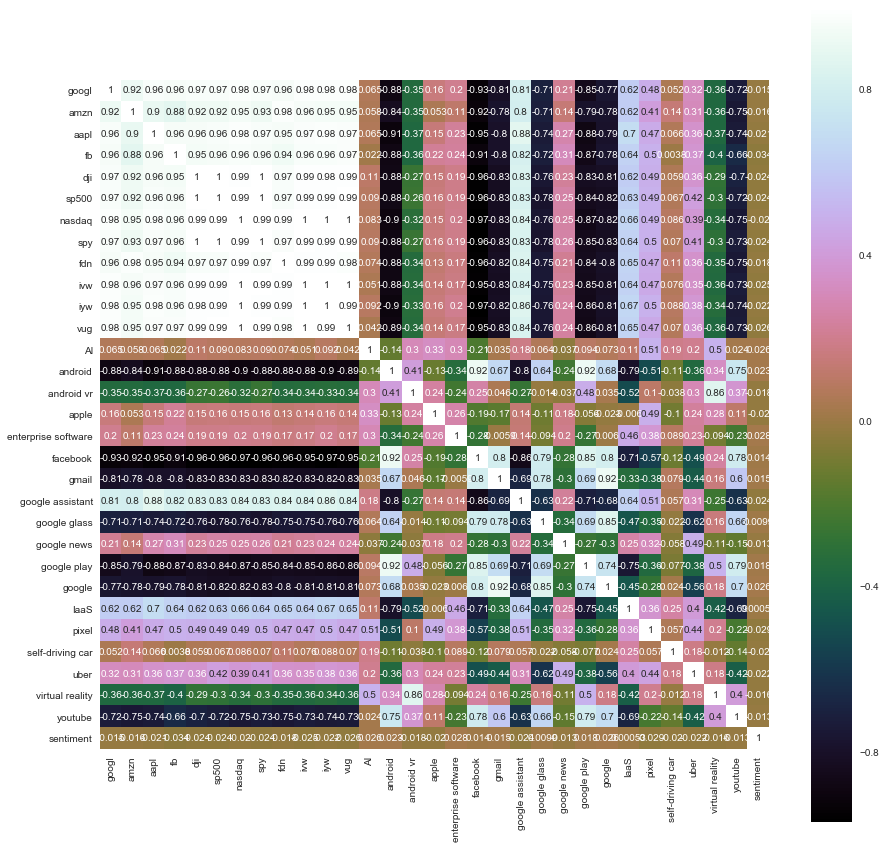

In [34]:
correlation = data_combined_scaled.corr()  
plt.figure(figsize=(15, 15))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

In [37]:
# Feature selection

import os
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from random import sample
from sklearn import tree
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

In [38]:
# Perform Dickey-fuller test to test the differenced series for stationality

for i in data_combined_scaled.columns:
    x = data_combined_scaled[i].values
    result = adfuller(x)
    
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
        
    
# Didn't pass the stationary test

googl
ADF Statistic: -0.4094119387270571
p-value: 0.9085154204659005
amzn
ADF Statistic: 1.176403966974141
p-value: 0.9958187328230633
aapl
ADF Statistic: -0.12517103950986597
p-value: 0.9468729679777973
fb
ADF Statistic: -0.8436125939593885
p-value: 0.8059744445241348
dji
ADF Statistic: -0.921193608685229
p-value: 0.7809129649722204
sp500
ADF Statistic: -0.978666433885987
p-value: 0.7609654938203122
nasdaq
ADF Statistic: 0.003995720006166545
p-value: 0.9588612845210346
spy
ADF Statistic: -0.8489738116583545
p-value: 0.8043116058740393
fdn
ADF Statistic: 1.398706898172284
p-value: 0.9971082596325788
ivw
ADF Statistic: 0.01574732953022444
p-value: 0.9598151653592768
iyw
ADF Statistic: 0.27244969891143833
p-value: 0.9760445813491078
vug
ADF Statistic: -0.17954254234026945
p-value: 0.940916565815015
AI
ADF Statistic: -2.461862999762767
p-value: 0.12503129461740498
android
ADF Statistic: -1.5679625018126355
p-value: 0.4996640863789053
android vr
ADF Statistic: -2.204092323620227
p-value: 0

In [39]:
# Differencing the dataset

df_diff = data_combined_scaled.diff(periods=1, axis=0)

diff = df_diff.dropna()

for i in diff.columns:
    x = diff[i].values
    result = adfuller(x)
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
# Now passed

googl
ADF Statistic: -10.386926130648666
p-value: 2.0684230675011256e-18
amzn
ADF Statistic: -8.132310227505922
p-value: 1.0820032292519588e-12
aapl
ADF Statistic: -9.183241909724147
p-value: 2.2226216070633374e-15
fb
ADF Statistic: -12.534311074094418
p-value: 2.390386442501381e-23
dji
ADF Statistic: -9.630362416986706
p-value: 1.6183612128964577e-16
sp500
ADF Statistic: -9.869701000857521
p-value: 4.025367156494905e-17
nasdaq
ADF Statistic: -10.346252618962126
p-value: 2.6063795980222848e-18
spy
ADF Statistic: -9.867128410858037
p-value: 4.085809988810969e-17
fdn
ADF Statistic: -10.300028509745625
p-value: 3.3912398182754194e-18
ivw
ADF Statistic: -10.22999413794468
p-value: 5.058268614477634e-18
iyw
ADF Statistic: -10.219210458216603
p-value: 5.380026102832313e-18
vug
ADF Statistic: -10.142116435922938
p-value: 8.367537628656114e-18
AI
ADF Statistic: -6.026636272362178
p-value: 1.450675269804295e-07
android
ADF Statistic: -5.665683758460433
p-value: 9.163420579073824e-07
android vr


In [40]:
# For cross validation, splitting data to test/train sets

from sklearn.model_selection import TimeSeriesSplit

#y = data_combined_scaled['googl']
#X = data_combined_scaled.drop('googl', axis=1)
y = diff['googl']
X = diff.drop('googl', axis=1)

tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = y[:len(train_index)], y[len(train_index): (len(train_index)+len(test_index))]

In [41]:
# Linear regression with all features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lreg = LinearRegression()

# Training a linear regression model on train
lreg.fit(X_train, y_train)

# Predicting on test
pred_test = lreg.predict(X_test)

# calculating RMSE
lm_testScore = math.sqrt(mean_squared_error(y_test, pred_test))
print('\033[1m' + 'RMSE of full linear model is:' + '\033[0m', lm_testScore)

# Evaluation using R^2
print('\033[1m' + 'R square of full linear model is:' + '\033[0m', lreg.score(X_test, y_test))

RMSE of full linear model is: 0.04828148062956984
R square of full linear model is: 0.7698875218317959


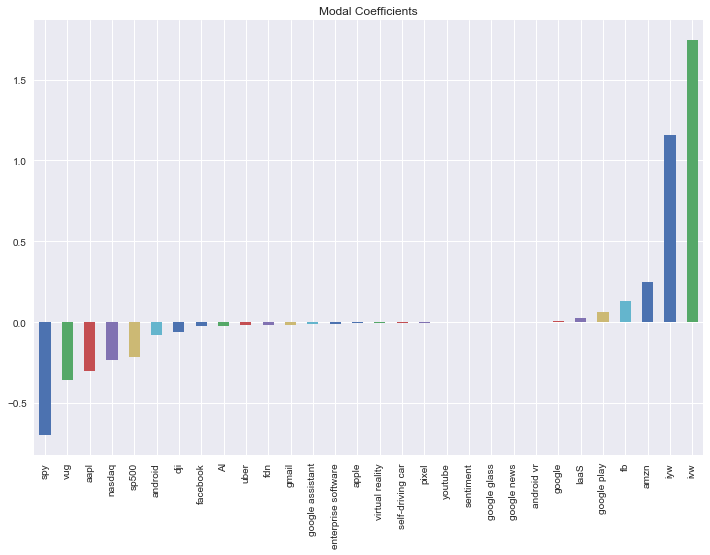

In [42]:
# Checking the magnitude of coefficients

coef = pd.Series(lreg.coef_, X_train.columns).sort_values()
plt.figure(figsize=(12, 8))
coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

# We can see that coefficients of some features are much higher as compared to rest of the coefficients. 
# Therefore the Google stock price would be more driven by these features

In [43]:
# Too many parameters, we try to use Ridge and LASSO to do feature selection

from sklearn.preprocessing import scale 
from sklearn import cross_validation 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error

# Generate an array of alpha values ranging from very big to very small
# Essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit
alphas = 10 ** np.linspace(10, -2, 100)  *0.5 
alphas

ridge = Ridge() 
coefs = []
for a in alphas: 
    ridge.set_params(alpha = a) 
    ridge.fit(X_train, y_train) 
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 30)

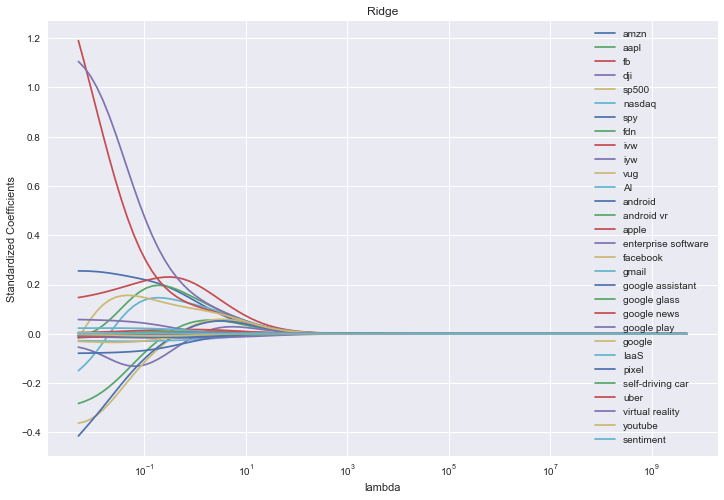

In [45]:
# Plot
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log') 
plt.axis('tight')
plt.legend(X_train.columns, loc='upper right')
plt.xlabel('lambda') 
plt.ylabel('Standardized Coefficients')
ax.set_title('Ridge')
plt.show()

In [46]:
# Use cross validation to determine the best lambda

ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error')
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)

0.005


In [47]:
ridge_opt = Ridge(alpha=ridgecv.alpha_) 
ridge_opt.fit(X_train, y_train)
ridge_testScore = math.sqrt(mean_squared_error(y_test, ridge_opt.predict(X_test)))
print('\033[1m' + 'RMSE of ridge model (out-of-sample) is:' + '\033[0m', ridge_testScore)
print('\033[1m' + 'R square of Ridge model is:' + '\033[0m', ridge_opt.score(X_test, y_test))

RMSE of ridge model (out-of-sample) is: 0.048087362755109074
R square of Ridge model is: 0.7717341573455148


In [48]:
# Reﬁt our ridge regression model on the full data set
# Using the value of alpha chosen by cross-validation, and examine the coefficient estimates

ridge_opt.fit(X, y)
print(pd.Series(ridge_opt.coef_, index=X.columns))

#coef_ridge = pd.Series(ridge_opt.coef_, X.columns).sort_values()
#coef_ridge.plot(kind='bar', title='Modal Coefficients')

# None of the coefficients are exactly zero, ridge regression does not perform variable selection!

amzn                   0.040769
aapl                  -0.234416
fb                     0.127627
dji                   -0.001071
sp500                 -0.425293
nasdaq                -0.307477
spy                   -0.294720
fdn                    0.180217
ivw                    1.337393
iyw                    1.065540
vug                   -0.129209
AI                    -0.016324
android               -0.090713
android vr             0.015395
apple                 -0.001387
enterprise software   -0.001223
facebook               0.010013
gmail                  0.005918
google assistant      -0.000615
google glass          -0.012624
google news            0.011073
google play            0.057580
google                 0.003562
IaaS                   0.022524
pixel                 -0.006667
self-driving car      -0.005514
uber                  -0.014667
virtual reality       -0.003415
youtube                0.004649
sentiment              0.001454
dtype: float64


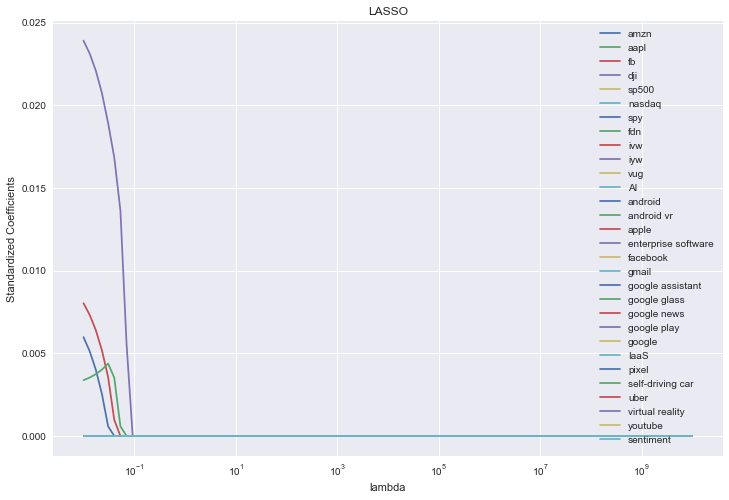

In [49]:
# LASSO model

lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas * 2, coefs)
ax.set_xscale('log')
plt.legend(X_train.columns, loc='upper right')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
ax.set_title('LASSO')
plt.show()

In [50]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
lasso_testScore = math.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
print('\033[1m' + 'RMSE of LASSO model (out-of-sample) is:' + '\033[0m', lasso_testScore)
print('\033[1m' + 'R square of LASSO model is:' + '\033[0m', lasso.score(X_test, y_test))

# We can see the accuracy doesn't drop a lot, LASSO is still ok

RMSE of LASSO model (out-of-sample) is: 0.047602219512058994
R square of LASSO model is: 0.7763167753312085


In [51]:
lasso.fit(X, y)
print(pd.Series(lasso.coef_, index=X.columns))

# The lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse.
# Here we see that 7 of the 29 coefficient estimates are exactly zero

amzn                   0.039479
aapl                  -0.231655
fb                     0.134779
dji                   -0.000000
sp500                 -0.655656
nasdaq                -0.093437
spy                   -0.000000
fdn                    0.103292
ivw                    1.057171
iyw                    1.014879
vug                   -0.000000
AI                    -0.015751
android               -0.072308
android vr             0.009756
apple                 -0.000820
enterprise software   -0.001274
facebook               0.000000
gmail                  0.000190
google assistant      -0.000000
google glass          -0.009163
google news            0.012755
google play            0.045407
google                 0.000000
IaaS                   0.021518
pixel                 -0.005772
self-driving car      -0.004308
uber                  -0.011111
virtual reality        0.000000
youtube                0.002932
sentiment              0.001432
dtype: float64


In [55]:
# Performing ElasticNet (kind of like the combanation of ridge and LASSO)
# However, it gives different result

en = ElasticNet(alpha=lassocv.alpha_, normalize=False)
en.fit(X, y)
coef = list(en.coef_)
count = 0
for i in X.columns:
    print(i, ':', coef[count])
    count = count + 1
    
# I'd rather choose to believe LASSO 

amzn : 0.044946302928288044
aapl : -0.22835651709109914
fb : 0.13276028774085794
dji : -0.0
sp500 : -0.4662970926809489
nasdaq : -0.20304367271604226
spy : -0.20099482020400913
fdn : 0.1427521836794082
ivw : 1.0985111556129687
iyw : 1.0377253292410011
vug : -0.0
AI : -0.01621196379168165
android : -0.08151750618708181
android vr : 0.011484237850432998
apple : -0.0010516717038587763
enterprise software : -0.0012031517474457335
facebook : 0.0
gmail : 0.004201737591927338
google assistant : -0.0
google glass : -0.010692359596126858
google news : 0.01227766650006864
google play : 0.05162173631797791
google : 0.0
IaaS : 0.02172590829783259
pixel : -0.006470817036499098
self-driving car : -0.004818993236562577
uber : -0.012629432912705407
virtual reality : -0.0
youtube : 0.0038290364624842185
sentiment : 0.001459132342189617


In [56]:
# Based on the LASSO results, manually identifying selected features (features with non-zero coefficients)

sig = ['amzn', 'aapl', 'fb', 'sp500', 'nasdaq', 'fdn', 'ivw', 'iyw', 'AI', 'android', 'android vr', 'apple', 'enterprise software', 'gmail', 'google glass', 'google news', 'google play', 'IaaS', 'pixel', 'self-driving car', 'uber', 'youtube','sentiment']
X_sig = X.drop(['dji', 'spy', 'vug', 'facebook', 'google assistant', 'google', 'virtual reality'], axis=1)

# Constructing dataframe
X_sig_train = pd.DataFrame(index=X_train.index, columns=[sig])
for i in sig:
    X_sig_train[i] = X_train[i]
    count = count + 1
    
X_sig_test = pd.DataFrame(index=X_test.index, columns=[sig])
for i in sig:
    X_sig_test[i] = X_test[i]
    count = count + 1
    
# Save dataframe
X_sig_train.to_csv('X_train.csv')
X_sig_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

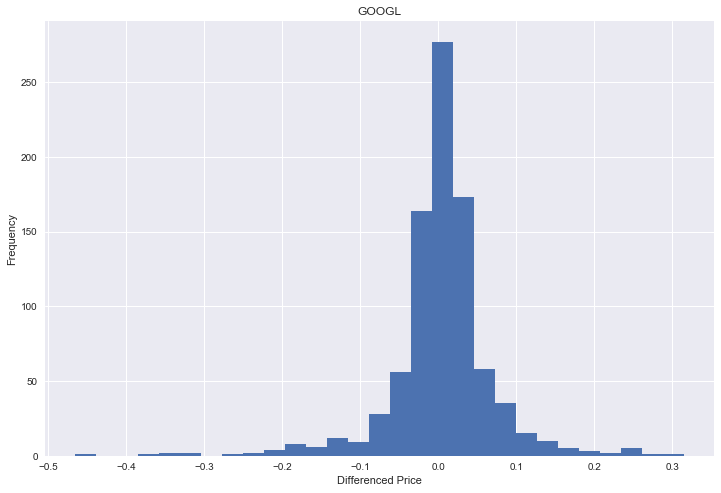

In [57]:
# Plotting Histogram of differenced series

n_data = len(y)
n_bins = int(np.sqrt(n_data))
plt.figure(figsize=(12, 8))
plt.hist(y, bins=n_bins)
plt.ylabel('Frequency')
plt.xlabel('Differenced Price')
plt.title('GOOGL', loc='center')
plt.show()

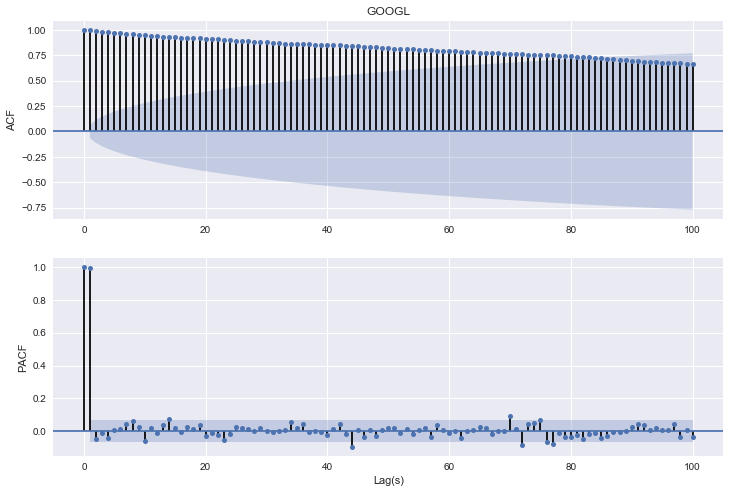

In [58]:
# ACF and PACF plot
import statsmodels.api as sm

%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plt.ylabel('ACF')
fig = sm.graphics.tsa.plot_acf(googl.squeeze(), lags=100, ax=ax1)
plt.title('GOOGL', loc='center')
ax2 = fig.add_subplot(212)
plt.ylabel('PACF')
fig = sm.graphics.tsa.plot_pacf(googl, lags=100, ax=ax2)
plt.title('')
plt.xlabel('Lag(s)')
plt.show()

# We use AR(1) model

                              ARMA Model Results                              
Dep. Variable:                  googl   No. Observations:                  661
Model:                     ARMA(1, 0)   Log Likelihood                1402.686
Method:                       css-mle   S.D. of innovations              0.029
Date:                Thu, 07 Jun 2018   AIC                          -2753.372
Time:                        19:36:45   BIC                          -2636.534
Sample:                    01-05-2016   HQIC                         -2708.088
                         - 10-26-2017                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0018      0.001     -1.478      0.140      -0.004       0.001
('amzn',)                    0.2659      0.058      4.564      0.000       0.152       0.

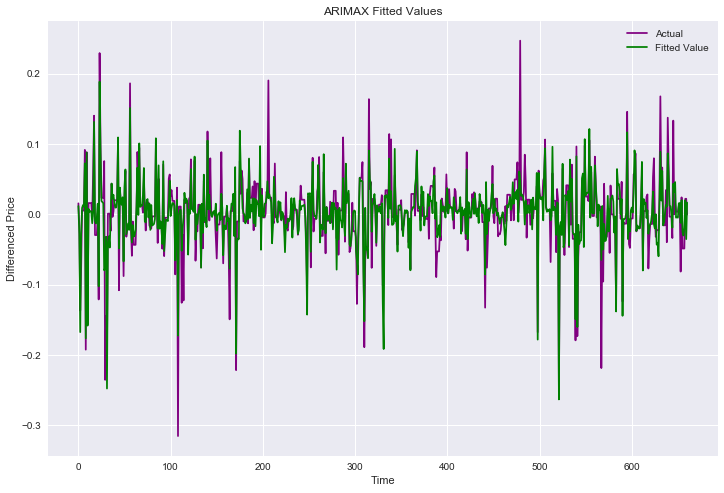

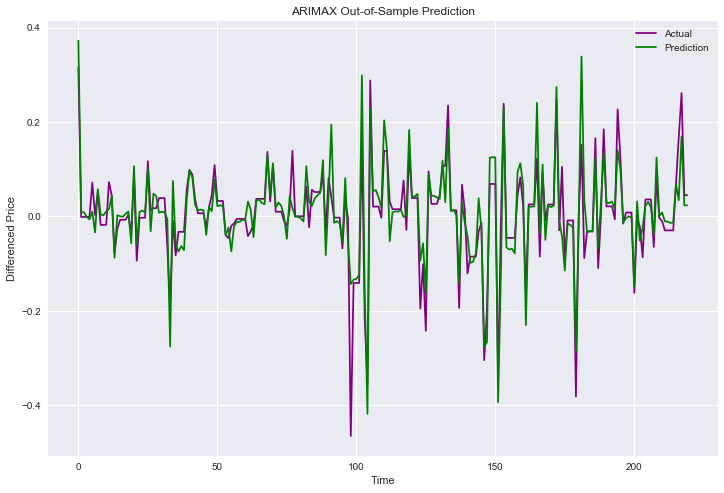

In [59]:
# ARIMAX
warnings.filterwarnings("ignore") # specify to ignore warning messages
import statsmodels.tsa.arima_model as ARIMA

# Building ARIMA(1, 1, 0) with exogeneous variables
arima_d = ARIMA.ARIMA(endog=y_train, exog=X_sig_train, order=[1, 0, 0])
arima_results_d = arima_d.fit()
print(arima_results_d.summary())

# Plotting the fitted values
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y_train)), y_train, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_d.fittedvalues)), arima_results_d.fittedvalues, color='green', label='Fitted Value')
#plt.xlim(400, 600)
plt.title('ARIMAX Fitted Values')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

# Out-of-sample prediction
exog_d = X_sig_test
arima_results_ofs_d = arima_results_d.predict(exog=exog_d, start=exog_d.index[0], end=exog_d.index[-1])
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y_test)), y_test, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_ofs_d)), arima_results_ofs_d, color='green', label='Prediction')
#plt.xlim((0, 50))
plt.title('ARIMAX Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [60]:
# Calculating mean squared error

expected = y_test
predictions = arima_results_ofs_d
mse = mean_squared_error(expected, predictions)
arima_testScore = math.sqrt(mean_squared_error(expected, predictions))
print('\033[1m' + 'RMSE of ARIMAX model (out-of-sample) is:' + '\033[0m', arima_testScore)

RMSE of ARIMAX model (out-of-sample) is: 0.04839799062281787


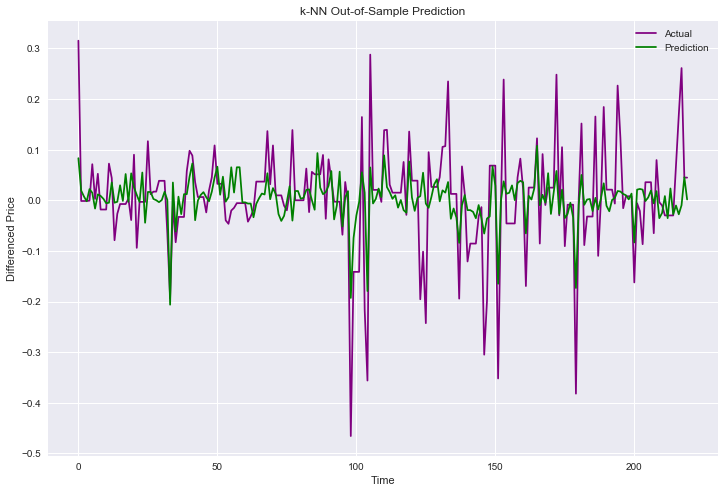

In [61]:
# Machine Learning
# k-NN
from sklearn import neighbors

# Fit regression model

n_neighbors = 3

knn = neighbors.KNeighborsRegressor(n_neighbors)
y_knn = knn.fit(X_sig_train, y_train).predict(X_sig_test)

# plot

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y_test)), y_test, color='purple', label='Actual')
plt.plot(np.arange(len(y_knn)), y_knn, color='green', label='Prediction')
#plt.xlim((0, 50))
plt.title('k-NN Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [62]:
# Prediction Accuracy

knn_testScore = math.sqrt(mean_squared_error(y_test, y_knn))
print('\033[1m' + 'RMSE of k-NN model (out-of-sample) is:' + '\033[0m', knn_testScore)

RMSE of k-NN model (out-of-sample) is: 0.07953805582406168


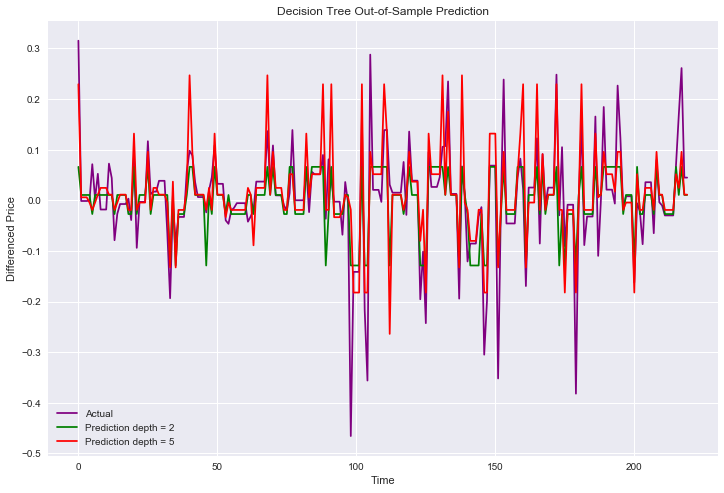

In [63]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_sig_train, y_train)
regr_2.fit(X_sig_train, y_train)

# Predict
y_tree_1 = regr_1.predict(X_sig_test)
y_tree_2 = regr_2.predict(X_sig_test)

# plot

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y_test)), y_test, color='purple', label='Actual')
plt.plot(np.arange(len(y_tree_1)), y_tree_1, color='green', label='Prediction depth = 2')
plt.plot(np.arange(len(y_tree_2)), y_tree_2, color='red', label='Prediction depth = 5')
#plt.xlim((0, 50))
plt.title('Decision Tree Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [64]:
# Prediction Accuracy

Dt_1_testScore = math.sqrt(mean_squared_error(y_test, y_tree_1))
Dt_2_testScore = math.sqrt(mean_squared_error(y_test, y_tree_2))
print('\033[1m' + 'RMSE of Decision Tree (depth = 2) model (out-of-sample) is:' + '\033[0m', Dt_1_testScore)
print('\033[1m' + 'RMSE of Decision Tree (depth = 5) model (out-of-sample) is:' + '\033[0m', Dt_2_testScore)

RMSE of Decision Tree (depth = 2) model (out-of-sample) is: 0.06783243080989874
RMSE of Decision Tree (depth = 5) model (out-of-sample) is: 0.06898881812216284


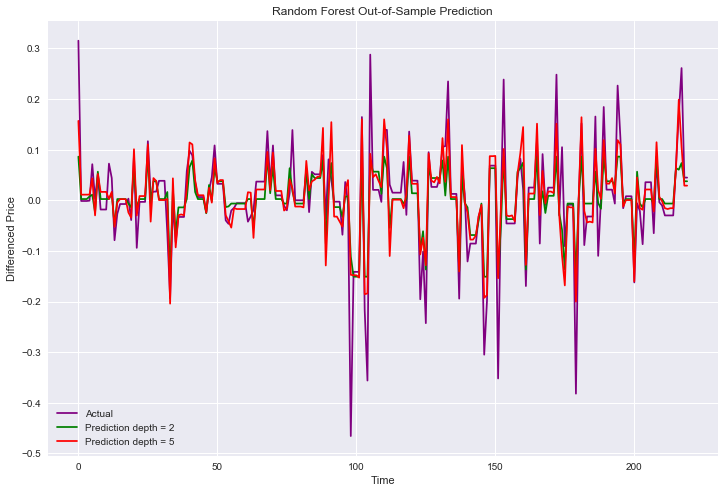

In [65]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

Rforest_1 = RandomForestRegressor(max_depth=2, random_state=0)
Rforest_2 = RandomForestRegressor(max_depth=5, random_state=0)
Rforest_1.fit(X_sig_train, y_train)
Rforest_2.fit(X_sig_train, y_train)

# Predict
y_forest_1 = Rforest_1.predict(X_sig_test)
y_forest_2 = Rforest_2.predict(X_sig_test)

# plot

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y_test)), y_test, color='purple', label='Actual')
plt.plot(np.arange(len(y_forest_1)), y_forest_1, color='green', label='Prediction depth = 2')
plt.plot(np.arange(len(y_forest_2)), y_forest_2, color='red', label='Prediction depth = 5')
#plt.xlim((0, 50))
plt.title('Random Forest Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [66]:
# Prediction Accuracy

Rf_1_testScore = math.sqrt(mean_squared_error(y_test, y_forest_1))
Rf_2_testScore = math.sqrt(mean_squared_error(y_test, y_forest_2))
print('\033[1m' + 'RMSE of Random Forest (depth = 2) model (out-of-sample) is:' + '\033[0m', Rf_1_testScore)
print('\033[1m' + 'RMSE of Random Forest (depth = 5) model (out-of-sample) is:' + '\033[0m', Rf_2_testScore)

RMSE of Random Forest (depth = 2) model (out-of-sample) is: 0.06123621754230477
RMSE of Random Forest (depth = 5) model (out-of-sample) is: 0.054621377850334885


In [67]:
# LSTM Neural Network

import math
import os
import time
import warnings
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
warnings.filterwarnings("ignore") #Hide messy Numpy warnings

Using TensorFlow backend.


In [68]:
train = pd.concat([X_sig_train, y_train], axis=1)
test = pd.concat([X_sig_test, y_test], axis=1)
data_sig = pd.concat([train, test], axis=0)
data_sig.to_csv('df_sig.csv')

In [69]:
# load dataset
dataset = pd.read_csv('df_sig.csv', header=0, index_col=0)
values = dataset.values

In [70]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [71]:
# frame as supervised learning
reframed = series_to_supervised(values, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1  -0.011005  -0.082061   0.018779   0.016032  -0.012931  -0.012997   
2  -0.003920  -0.062479   0.008837  -0.104704  -0.061739  -0.021314   
3  -0.084978  -0.132104  -0.185944  -0.186727  -0.162280  -0.138283   
4  -0.003061   0.015852  -0.021724  -0.083368  -0.050793  -0.041069   
5   0.012254   0.016267   0.002209   0.002164  -0.002085  -0.002079   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)    ...     var15(t)  var16(t)  \
1   0.012023  -0.020080  -0.031682   -0.059126    ...     0.013432 -0.028748   
2  -0.068317  -0.050769  -0.031682   -0.059126    ...     0.013432 -0.028748   
3  -0.156311  -0.128817  -0.031682   -0.059126    ...     0.013432 -0.028748   
4  -0.057934  -0.029931  -0.031682   -0.059126    ...     0.013432 -0.028748   
5   0.005465   0.006441  -0.031682   -0.059126    ...     0.013432 -0.028748   

   var17(t)  var18(t)  var19(t)  var20(t)  var21(t)  var22(t)  var23(t)  \
1 -0.059616  0.05

In [72]:
# split into train and test sets
values = reframed.values
#n_train = len(values) * 0.75
#train = values[:n_train, :]
#test = values[n_train:, :]

X_lstm = values[:, :-1]
y_lstm = values[:, -1]

for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_X, test_X = X_lstm[:len(train_index)], X_lstm[len(train_index): (len(train_index)+len(test_index))]
    train_y, test_y = y_lstm[:len(train_index)], y_lstm[len(train_index): (len(train_index)+len(test_index))]
# split into input and outputs
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(661, 1, 47) (661,) (219, 1, 47) (219,)


In [73]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 661 samples, validate on 219 samples
Epoch 1/100
 - 3s - loss: 0.0482 - val_loss: 0.0526
Epoch 2/100
 - 0s - loss: 0.0306 - val_loss: 0.0438
Epoch 3/100
 - 0s - loss: 0.0252 - val_loss: 0.0371
Epoch 4/100
 - 0s - loss: 0.0221 - val_loss: 0.0336
Epoch 5/100
 - 0s - loss: 0.0210 - val_loss: 0.0322
Epoch 6/100
 - 0s - loss: 0.0202 - val_loss: 0.0320
Epoch 7/100
 - 0s - loss: 0.0202 - val_loss: 0.0321
Epoch 8/100
 - 0s - loss: 0.0201 - val_loss: 0.0321
Epoch 9/100
 - 0s - loss: 0.0201 - val_loss: 0.0321
Epoch 10/100
 - 0s - loss: 0.0200 - val_loss: 0.0320
Epoch 11/100
 - 0s - loss: 0.0199 - val_loss: 0.0323
Epoch 12/100
 - 0s - loss: 0.0198 - val_loss: 0.0318
Epoch 13/100
 - 0s - loss: 0.0192 - val_loss: 0.0316
Epoch 14/100
 - 0s - loss: 0.0192 - val_loss: 0.0320
Epoch 15/100
 - 0s - loss: 0.0193 - val_loss: 0.0321
Epoch 16/100
 - 0s - loss: 0.0190 - val_loss: 0.0317
Epoch 17/100
 - 0s - loss: 0.0190 - val_loss: 0.0323
Epoch 18/100
 - 0s - loss: 0.0192 - val_loss: 0.0317
Epoch 19/

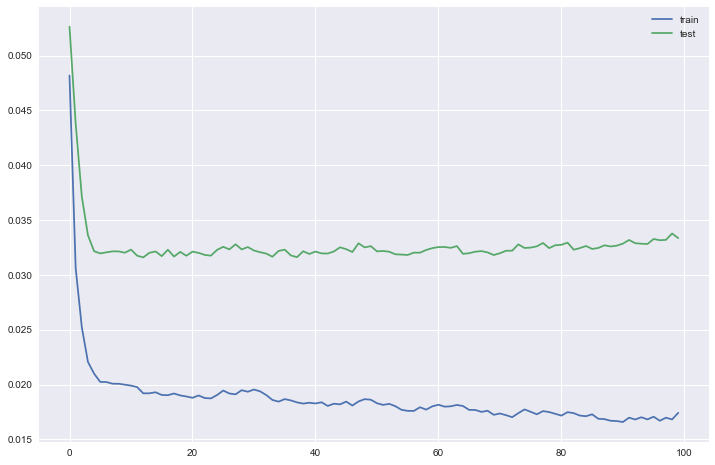

In [74]:
# plot history
from matplotlib import pyplot

plt.figure(figsize=(12, 8))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [75]:
# make a prediction
y_lstm = model.predict(test_X)

# calculate RMSE
LSTM_testscore = math.sqrt(mean_squared_error(test_y, y_lstm))
print('\033[1m' + 'RMSE of LSTM model (out-of-sample) is:' + '\033[0m', LSTM_testscore)

RMSE of LSTM model (out-of-sample) is: 0.053482284509406244


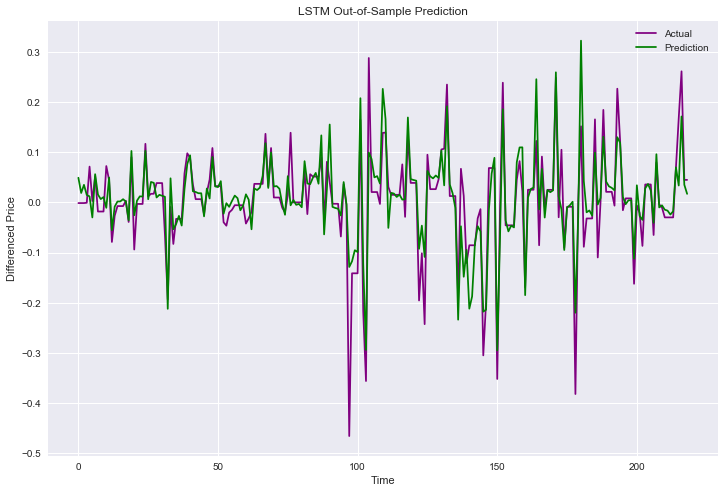

In [76]:
# plot

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(test_y)), test_y, color='purple', label='Actual')
plt.plot(np.arange(len(y_lstm)), y_lstm, color='green', label='Prediction')
#plt.xlim((0, 50))
plt.title('LSTM Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()